In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import random
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/dataverse_files/MiMM_SBILab Dataset'
canc = []
l = os.listdir('/content/drive/My Drive/dataverse_files/MiMM_SBILab Dataset')
for i in range(40):
    img_arr = cv2.imread((os.path.join(path,l[i])),-1)
    new_arr = cv2.resize(img_arr,(512,512))
    canc.append([new_arr,1])
canc[35]

[array([[[182, 154, 158],
         [185, 162, 158],
         [186, 171, 166],
         ...,
         [157, 147, 153],
         [158, 141, 153],
         [151, 135, 145]],
 
        [[184, 154, 147],
         [180, 159, 163],
         [187, 171, 169],
         ...,
         [158, 148, 159],
         [157, 143, 146],
         [150, 134, 150]],
 
        [[182, 150, 150],
         [182, 162, 161],
         [185, 172, 174],
         ...,
         [159, 143, 155],
         [158, 141, 150],
         [151, 131, 140]],
 
        ...,
 
        [[150, 129, 164],
         [150, 126, 147],
         [147, 114, 138],
         ...,
         [179, 156, 171],
         [180, 160, 171],
         [182, 154, 176]],
 
        [[154, 124, 146],
         [145, 116, 140],
         [145, 109, 135],
         ...,
         [181, 158, 176],
         [181, 155, 179],
         [184, 158, 176]],
 
        [[148, 115, 136],
         [144, 112, 135],
         [146, 112, 145],
         ...,
         [180, 157, 177],
  

In [ ]:
nc_path = '/content/drive/My Drive/new1'
non_canc = []
la = os.listdir('/content/drive/My Drive/new1')
for i in range(40):
    img_arr = cv2.imread((os.path.join(nc_path,la[i])),-1)
    new_arr = cv2.resize(img_arr,(512,512))
    non_canc.append([new_arr,0])
non_canc[15]

[array([[[164,  69,  51],
         [164,  69,  51],
         [164,  69,  51],
         ...,
         [201, 196, 197],
         [201, 196, 197],
         [201, 196, 197]],
 
        [[164,  69,  51],
         [164,  69,  51],
         [164,  69,  51],
         ...,
         [201, 196, 197],
         [201, 196, 197],
         [201, 196, 197]],
 
        [[164,  69,  51],
         [164,  69,  51],
         [164,  69,  51],
         ...,
         [201, 196, 197],
         [201, 196, 197],
         [201, 196, 197]],
 
        ...,
 
        [[210, 211, 211],
         [210, 211, 211],
         [210, 211, 211],
         ...,
         [206, 211, 210],
         [206, 211, 210],
         [206, 211, 210]],
 
        [[210, 211, 211],
         [210, 211, 211],
         [210, 211, 211],
         ...,
         [206, 211, 210],
         [206, 211, 210],
         [206, 211, 210]],
 
        [[210, 211, 211],
         [210, 211, 211],
         [210, 211, 211],
         ...,
         [206, 211, 210],
  

In [ ]:
len(canc)

40

In [ ]:
l = canc + non_canc
random.shuffle(l)

In [ ]:
len(l)

80

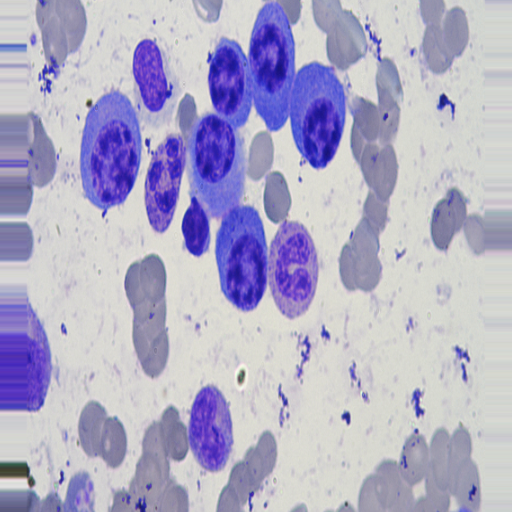

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(l[19][0])

In [ ]:
x = []
y = []
for img,label in l:
    x.append(img)
    y.append(label)

In [ ]:
x = np.array(x)

In [ ]:
#x = x/255.0


In [ ]:
len(x)

80

In [ ]:
import tensorflow
y = tensorflow.keras.utils.to_categorical(y,num_classes=2)

In [ ]:
y[:10]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
for i in x:
  i[:,:,0] = clahe.apply(i[:,:,0])
  i[:,:,1] = clahe.apply(i[:,:,1])
  i[:,:,2] = clahe.apply(i[:,:,2])

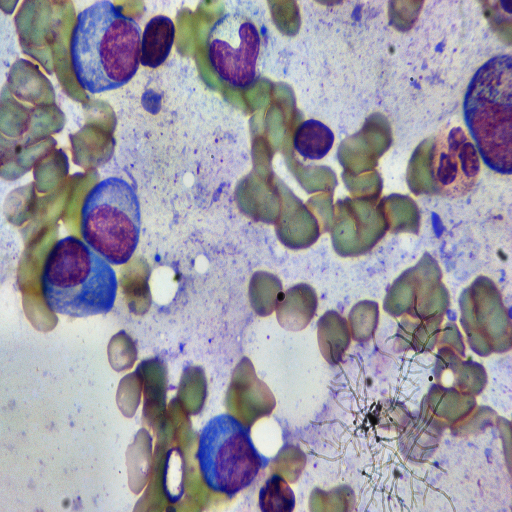

In [ ]:
cv2_imshow(x[1])

In [ ]:
y[1]

array([0., 1.], dtype=float32)

In [ ]:
def mask(img):
  hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  pink_lower = np.array([100, 100, 30])
  pink_upper = np.array([255, 250, 250])
  mask = cv2.inRange(hsv_img, pink_lower, pink_upper)
  return(mask)

In [ ]:
def seg(img):
  yield (cv2.bitwise_and(img, img, mask = mask(img)))

In [ ]:
seg_list = []
for i in x:
  q = list(seg(i))
  seg_list.append(q[0])

In [ ]:
seg_list = np.array(seg_list)
#seg_list = np.reshape((56,512,512,3))
seg_list.shape

(80, 512, 512, 3)

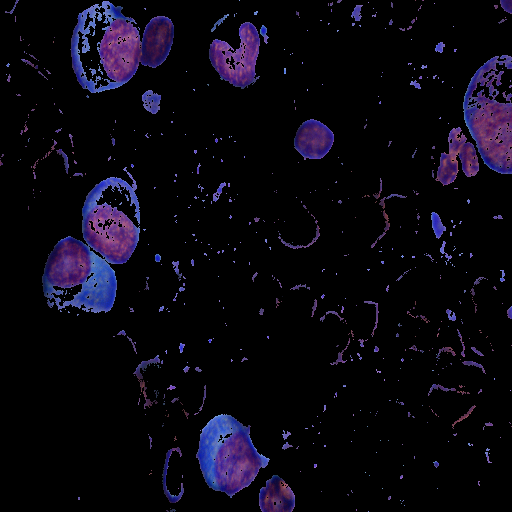

In [ ]:
cv2_imshow(seg_list[1])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(seg_list,y,test_size = 0.30,random_state = 1)

In [ ]:
len(x_train)

56

In [ ]:
len(y_test)

24

In [ ]:
x_train.shape

(56, 512, 512, 3)

In [ ]:
x_test.shape

(24, 512, 512, 3)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
y_test.shape

(24, 2)

In [ ]:
y_test[0]

array([0., 1.], dtype=float32)

In [ ]:
import tensorflow as tf
import os
from tensorflow import keras
from keras import Sequential
from keras.layers import (Conv2D,Flatten,Dense,Dropout,
BatchNormalization,ZeroPadding2D,MaxPooling2D,GlobalAveragePooling2D,Activation,LeakyReLU)
from keras.optimizers import RMSprop, SGD
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint

In [ ]:
def get_net(): 
  model = Sequential()  
  model.add(Conv2D(96, (11, 11), input_shape = (512,512,3), padding='same')) 
  model.add(Activation('relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  
  model.add(Conv2D(128, (5, 5), padding='same')) 
  model.add(Activation('relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2),strides=2)) 
  model.add(ZeroPadding2D((1,1))) 

  model.add(Conv2D(384, (3, 3), padding='same')) 
  model.add(Activation('relu')) 
  model.add(ZeroPadding2D((1,1))) 
  
  model.add(Conv2D(192, (3, 3), padding='same')) 
  model.add(Activation('relu')) 
  model.add(ZeroPadding2D((1,1))) 
  
  model.add(Conv2D(128, (3, 3), padding='same')) 
  model.add(Activation('relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  model.add(GlobalAveragePooling2D()) 
#---------------ANN----------------------------------  
  model.add(Dense(4096, kernel_initializer='glorot_normal')) 
  model.add(Activation('relu')) 
  model.add(Dropout(0.5)) 
 
  model.add(Dense(4096, kernel_initializer='glorot_normal')) 
  model.add(Activation('relu')) 
  model.add(Dropout(0.5)) 
 
  model.add(Dense(2, kernel_initializer='glorot_normal')) 
  model.add(Activation('softmax')) 
  return model

In [ ]:
net = get_net()
net.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 512, 512, 96)      34944     
_________________________________________________________________
activation_49 (Activation)   (None, 512, 512, 96)      0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 256, 256, 96)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 256, 256, 128)     307328    
_________________________________________________________________
activation_50 (Activation)   (None, 256, 256, 128)     0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 128, 128, 128)     0         
_________________________________________________________________
zero_padding2d_21 (ZeroPaddi (None, 130, 130, 128)   

In [ ]:
net.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
net.fit(x_train, y_train, batch_size=5, epochs=2, validation_split=0.1)


Epoch 1/2
10/10 [==============================] - 4s 376ms/step - loss: 3863.4622 - accuracy: 0.5800 - val_loss: 0.9356 - val_accuracy: 0.5000
Epoch 2/2
10/10 [==============================] - 4s 357ms/step - loss: 1.1028 - accuracy: 0.6200 - val_loss: 0.8356 - val_accuracy: 0.5000


In [ ]:
intermediate_layer_model = keras.Model(inputs=net.input,
                                 outputs=net.get_layer('dense_12').output)

In [ ]:
svm_x_train = intermediate_layer_model.predict(x_train)
svm_x_test = intermediate_layer_model.predict(x_test)

In [ ]:
y_train1 = []
for i in y_train:
  y_train1.append(np.argmax(i))

In [ ]:
y_test1 = []
for i in y_test:
  y_test1.append(np.argmax(i))

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(svm_x_train, y_train1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf = rf_random.best_estimator_

In [ ]:
predictions = rf.predict(svm_x_test)

In [ ]:
accuracy_score(predictions , y_test1)

1.0

In [ ]:
print(confusion_matrix(y_test1, predictions))
print(classification_report(y_test1, predictions))

[[11  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [ ]:
path = '/content/drive/My Drive/dataverse_files/MiMM_SBILab Dataset'
test_canc = []
l = os.listdir('/content/drive/My Drive/dataverse_files/MiMM_SBILab Dataset')
for i in range(41,50):
    img_arr = cv2.imread((os.path.join(path,l[i])),-1)
    new_arr = cv2.resize(img_arr,(512,512))
    test_canc.append([new_arr,1])

In [ ]:
nc_path = '/content/drive/My Drive/new1'
test_non_canc = []
for i in range(41,50):
    img_arr = cv2.imread((os.path.join(nc_path,la[i])),-1)
    new_arr = cv2.resize(img_arr,(512,512))
    test_non_canc.append([new_arr,0])

In [ ]:
l1 = test_canc + test_non_canc
random.shuffle(l1)

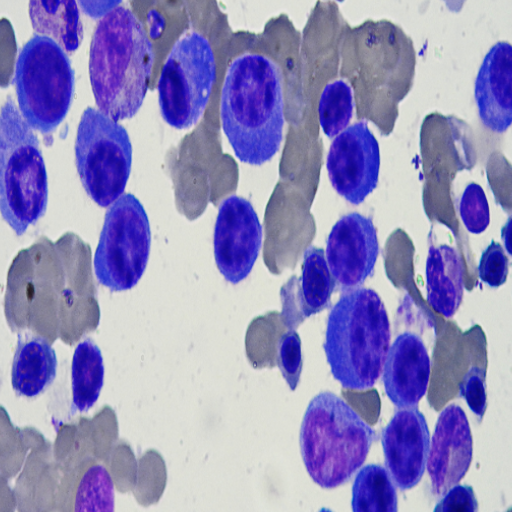

In [ ]:
cv2_imshow(l1[0][0])

In [ ]:
x = []
y = []
for img,label in l1:
    x.append(img)
    y.append(label)

In [ ]:
x = np.array(x)

In [ ]:
x.shape

(18, 512, 512, 3)

In [ ]:
x1 = []
for i in x:
  #i = i.astype("int16")
  q = list(seg(i))
  x1.append(q[0])

y = np.array(y)
y_temp = np.copy(y)

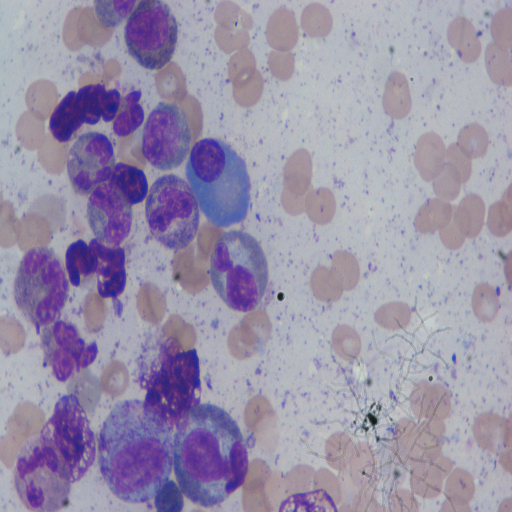

In [ ]:
cv2_imshow(x[1])

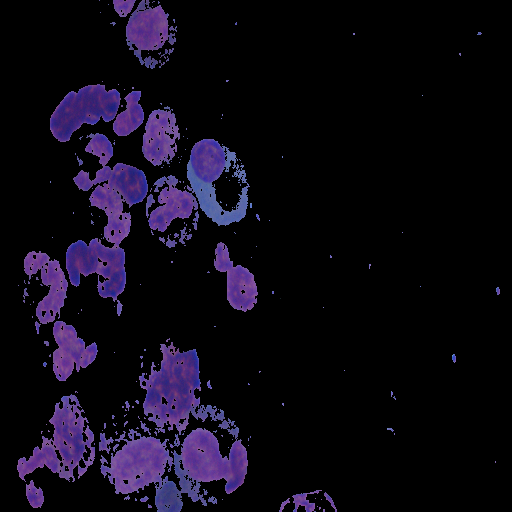

In [ ]:
cv2_imshow(x1[1])

In [ ]:
y[3]

0

In [ ]:
len(x1)

18

In [ ]:
x1 = np.array(x1)
x1.shape

(18, 512, 512, 3)

In [ ]:
y_temp[:10]

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
unseen_features = intermediate_layer_model.predict(x1)

In [ ]:
unseen_features.shape

(18, 4096)

In [ ]:
pred = rf.predict(unseen_features)
print(accuracy_score(y_temp, pred))
print(confusion_matrix(y_temp, pred))
print(classification_report(y_temp, pred))

0.5
[[9 0]
 [9 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         9
           1       0.00      0.00      0.00         9

    accuracy                           0.50        18
   macro avg       0.25      0.50      0.33        18
weighted avg       0.25      0.50      0.33        18



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
proba = []
z = model.predict_proba([x_test])
for i in z:
  proba.append(np.max(i))

In [ ]:
from sklearn.metrics import roc_curve


In [ ]:
y_temp0 = np.array([np.argmax(i) for i in y_test])
y_temp0

In [ ]:
fpr, tpr, thresholds = roc_curve(y_temp0, proba)

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel('false-positive')
plt.ylabel('true-positive')

In [ ]:
import seaborn as sns

In [ ]:
zeroes = []
ones = []
for i in zip(y_temp0, proba):
  if(i[0] == 0):
    zeroes.append(i[1])
  else:
    ones.append(i[1])
  

In [ ]:
def standard(x):
  mean = np.mean(x)
  std = np.std(x)
  for i in x:
    yield((i-mean)/std)

In [ ]:
z = [] 
q = standard(zeroes)
for i in q:
  z.append(i)

In [ ]:
o = []
q = standard(ones)
for i in q:
  o.append(i)

In [ ]:
sns.displot(z,kind='kde')
plt.xlabel('zero-probabilities')
sns.displot(o,kind='kde')
plt.xlabel('one-probabilities')

In [ ]:
sns.jointplot(data =[z,o],kind='kde') 